# Proyecto: Análisis de Detección de Objetos en Carreteras
## Autor: Edgar Amaro Cantoral
## Descripción: Este proyecto realiza un análisis de datos utilizando Python, Spark, Excel y SQL para explorar un conjunto de datos de detección de objetos en carreteras polacas.

In [6]:
#!pip install pyspark

In [7]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pyspark.sql import SparkSession
from google.colab import files

In [8]:
# Paso 2: Cargar el archivo CSV (Sube el archivo desde tu computadora)
uploaded = files.upload()

Saving data.csv to data.csv


In [9]:
# Paso 3: Cargar los datos en un DataFrame de pandas
filename = list(uploaded.keys())[0]  # Obtiene el nombre del archivo cargado
df = pd.read_csv(filename)

# Exploración Inicial de Datos

In [10]:
# Paso 4: Exploración inicial de datos
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
                     Set  Photos    Car  Different-Traffic-Sign  \
0               Test Set     166    687                     547   
1              Train Set    1178   4766                    3370   
2         Validation Set     327   1343                     945   
3   Test Set (Augmented)     996   4122                    3282   
4  Train Set (Augmented)    7068  28596                   20220   

   Red-Traffic-Light  Pedestrian  Warning-Sign  Pedestrian-Crossing  \
0                163         137            79                   82   
1                805         812           544                  476   
2                232         228           163                  112   
3                978         822           474                  492   
4               4830        4872          3264                 2856   

   Green-Traffic-Light  Prohibition-Sign  Truck  Speed-Limit-Sign  Motorcycle  
0                   52                48     66             

In [11]:
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Set                     6 non-null      object
 1   Photos                  6 non-null      int64 
 2   Car                     6 non-null      int64 
 3   Different-Traffic-Sign  6 non-null      int64 
 4   Red-Traffic-Light       6 non-null      int64 
 5   Pedestrian              6 non-null      int64 
 6   Warning-Sign            6 non-null      int64 
 7   Pedestrian-Crossing     6 non-null      int64 
 8   Green-Traffic-Light     6 non-null      int64 
 9   Prohibition-Sign        6 non-null      int64 
 10  Truck                   6 non-null      int64 
 11  Speed-Limit-Sign        6 non-null      int64 
 12  Motorcycle              6 non-null      int64 
dtypes: int64(12), object(1)
memory usage: 752.0+ bytes
None


In [12]:
print("\nDescripción estadística:")
print(df.describe())


Descripción estadística:
            Photos           Car  Different-Traffic-Sign  Red-Traffic-Light  \
count     6.000000      6.000000                6.000000            6.00000   
mean   1949.500000   7928.666667             5672.333333         1400.00000   
std    2589.090632  10463.855000             7365.673972         1743.07005   
min     166.000000    687.000000              547.000000          163.00000   
25%     494.250000   2037.750000             1529.250000          375.25000   
50%    1087.000000   4444.000000             3326.000000          891.50000   
75%    1766.000000   7235.000000             5095.000000         1288.50000   
max    7068.000000  28596.000000            20220.000000         4830.00000   

        Pedestrian  Warning-Sign  Pedestrian-Crossing  Green-Traffic-Light  \
count     6.000000       6.00000             6.000000             6.000000   
mean   1373.166667     917.00000           781.666667           631.166667   
std    1772.008399    1193.1

# Limpieza y Preprocesamiento de Datos


In [14]:
# Paso 5: Limpieza y Preprocesamiento de Datos
# Eliminar filas con valores nulos
df = df.dropna()

# Eliminar filas duplicadas
df = df.drop_duplicates()

In [15]:
# Verificación de limpieza
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Set                       0
Photos                    0
Car                       0
Different-Traffic-Sign    0
Red-Traffic-Light         0
Pedestrian                0
Warning-Sign              0
Pedestrian-Crossing       0
Green-Traffic-Light       0
Prohibition-Sign          0
Truck                     0
Speed-Limit-Sign          0
Motorcycle                0
dtype: int64


In [16]:
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


# Preprocesamiento y Transformación de Datos con Spark

In [17]:
# Crear una sesión de Spark
spark = SparkSession.builder.appName('TrafficObjectDetection').getOrCreate()

In [18]:
# Convertir el DataFrame de pandas a un DataFrame de Spark
spark_df = spark.createDataFrame(df)

In [19]:
# Preprocesamiento en Spark (opcional, dependiendo de los datos)
# spark_df = spark_df.dropna().dropDuplicates()

In [20]:
# Mostrar el esquema del DataFrame de Spark
spark_df.printSchema()

root
 |-- Set: string (nullable = true)
 |-- Photos: long (nullable = true)
 |-- Car: long (nullable = true)
 |-- Different-Traffic-Sign: long (nullable = true)
 |-- Red-Traffic-Light: long (nullable = true)
 |-- Pedestrian: long (nullable = true)
 |-- Warning-Sign: long (nullable = true)
 |-- Pedestrian-Crossing: long (nullable = true)
 |-- Green-Traffic-Light: long (nullable = true)
 |-- Prohibition-Sign: long (nullable = true)
 |-- Truck: long (nullable = true)
 |-- Speed-Limit-Sign: long (nullable = true)
 |-- Motorcycle: long (nullable = true)



# Análisis Exploratorio de Datos (EDA)

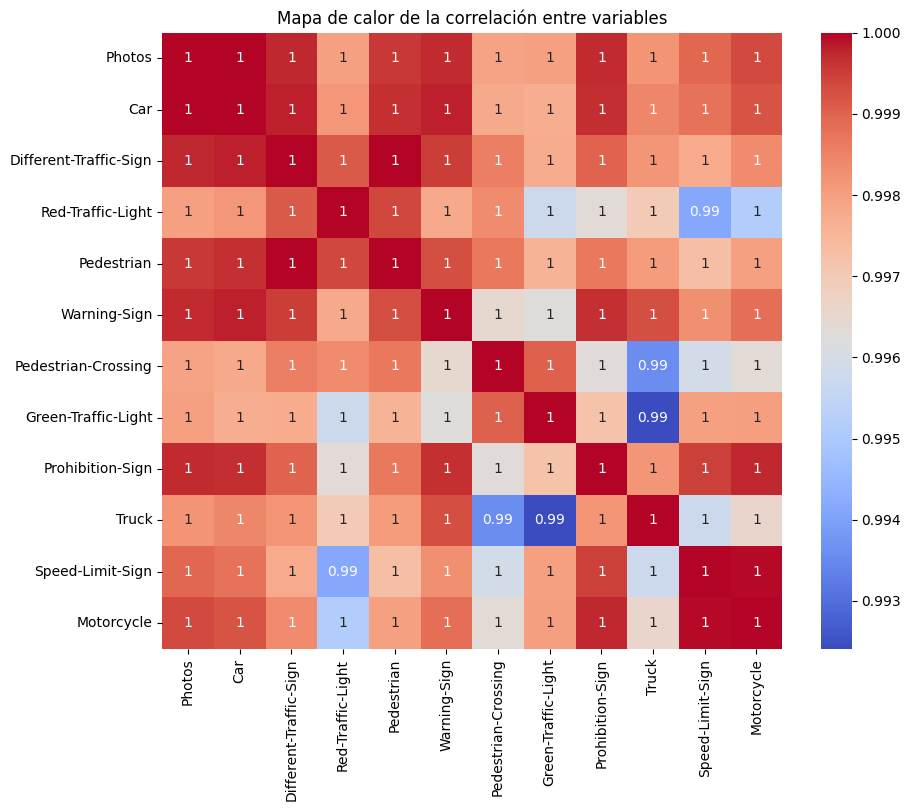

In [24]:
# Seleccionar solo columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Análisis de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

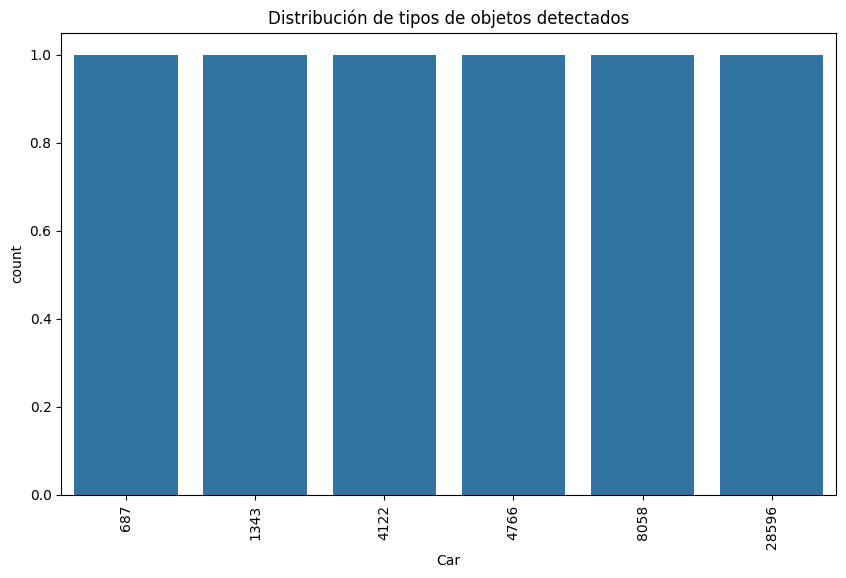

In [26]:
# Distribución de objetos detectados
plt.figure(figsize=(10, 6))
sns.countplot(x='Car', data=df)
plt.title('Distribución de tipos de objetos detectados')
plt.xticks(rotation=90)
plt.show()

# Almacenamiento y Consulta de Datos con SQL

In [27]:
# Conectar a una base de datos SQLite
conn = sqlite3.connect('traffic_detection.db')

In [28]:
# Guardar el DataFrame en SQL
df.to_sql('traffic_objects', conn, if_exists='replace', index=False)

6

In [30]:
# Realizar una consulta SQL
query = "SELECT Photos, COUNT(*) AS count FROM traffic_objects GROUP BY Photos;"
result = pd.read_sql_query(query, conn)

In [31]:
# Mostrar los resultados de la consulta
print("\nConteo de tipos de objetos detectados:")
print(result)


Conteo de tipos de objetos detectados:
   Photos  count
0     166      1
1     327      1
2     996      1
3    1178      1
4    1962      1
5    7068      1


# Visualización y Presentación de Resultados

<Figure size 1000x600 with 0 Axes>

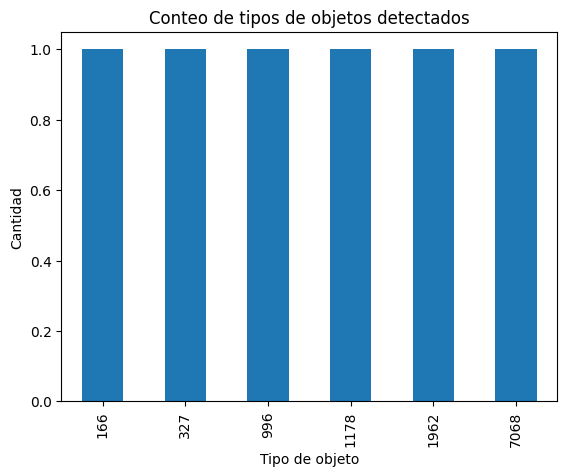

In [33]:
# Visualización de los resultados en forma de gráfico de barras
plt.figure(figsize=(10, 6))
result.plot(kind='bar', x='Photos', y='count', legend=False)
plt.title('Conteo de tipos de objetos detectados')
plt.xlabel('Tipo de objeto')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Exportar los resultados a un archivo Excel
result.to_excel('traffic_analysis_summary.xlsx', index=False)

In [35]:
print("\nEl análisis se ha completado y los resultados han sido guardados en 'traffic_analysis_summary.xlsx'.")


El análisis se ha completado y los resultados han sido guardados en 'traffic_analysis_summary.xlsx'.
